In [1]:
# --------------------------------------------
# STEP 1: Import Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

# --------------------------------------------
# STEP 2: Load Dataset
# --------------------------------------------
df = pd.read_csv("arrest_data_2020_2023_1.csv")
print("Initial shape:", df.shape)

# --------------------------------------------
# STEP 3: Drop Unneeded Columns
# --------------------------------------------
df.columns = df.columns.str.strip()
df = df.drop(columns=["PK", "ORIGINAL_ROW"], errors='ignore')

# --------------------------------------------
# STEP 4: Drop or Fix Missing / Invalid Data
# --------------------------------------------
# Drop rows with missing critical info
df = df.dropna(subset=["OFFENSES", "ARRESTTIME", "RACE", "GENDER", "ARRESTLOCATION", "X", "Y", "INCIDENTTRACT", "PUBLIC_WORKS_DIVISION"])
# Drop age = 0 and fill categorical nulls
df = df[df["AGE"].notnull() & (df["AGE"] > 0)]
df["INCIDENTZONE"] = df["INCIDENTZONE"].fillna("Unknown")
df["COUNCIL_DISTRICT"] = df["COUNCIL_DISTRICT"].fillna("Unknown")
df["INCIDENTNEIGHBORHOOD"] = df["INCIDENTNEIGHBORHOOD"].fillna("Unknown")

# --------------------------------------------
# STEP 5: Time Feature Extraction
# --------------------------------------------
df["ARRESTTIME"] = pd.to_datetime(df["ARRESTTIME"], errors='coerce')
df["ARREST_YEAR"] = df["ARRESTTIME"].dt.year
df["ARREST_MONTH"] = df["ARRESTTIME"].dt.month
df["ARREST_HOUR"] = df["ARRESTTIME"].dt.hour
df["ARREST_DAY"] = df["ARRESTTIME"].dt.day_name()

# --------------------------------------------
# STEP 6: Extract ZIP Code from Address
# --------------------------------------------
df["ARREST_ZIPCODE"] = df["ARRESTLOCATION"].astype(str).str.extract(r'(\d{5})')
df = df.dropna(subset=["ARREST_ZIPCODE"])
df["ARREST_ZIPCODE"] = df["ARREST_ZIPCODE"].astype(str)

# --------------------------------------------
# STEP 7: Extract and Categorize Offense
# --------------------------------------------
df_split = df["OFFENSES"].astype(str).str.split("/", expand=True)
df["OFFENSE_PRIMARY"] = df_split[0].str.strip()

def map_offense_type(offense):
    offense = str(offense).lower()
    if "assault" in offense or "robbery" in offense or "homicide" in offense:
        return "Violent"
    elif "theft" in offense or "burglary" in offense or "mischief" in offense:
        return "Property"
    elif "drug" in offense or "controlled substance" in offense or "possession" in offense:
        return "Drug-Related"
    elif "disorderly" in offense or "drunkenness" in offense or "obstructing" in offense:
        return "Public Order"
    else:
        return "Other"

df["OFFENSE_TYPE"] = df["OFFENSE_PRIMARY"].apply(map_offense_type)

# --------------------------------------------
# STEP 8: Drop Redundant Raw Text Fields
# --------------------------------------------
df = df.drop(columns=["OFFENSES", "OFFENSE_PRIMARY", "ARRESTTIME", "ARRESTLOCATION", "INCIDENTZONE", "INCIDENTLOCATION"], errors='ignore')

# --------------------------------------------
# STEP 9: Encode Categorical Variables
# --------------------------------------------
categorical_cols = ["RACE", "GENDER", "INCIDENTNEIGHBORHOOD", "ARREST_DAY"]
df[categorical_cols] = df[categorical_cols].astype(str)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --------------------------------------------
# STEP 10: Scale Numerical Features
# --------------------------------------------
scaler = StandardScaler()
numeric_cols = ["AGE", "X", "Y", "ARREST_HOUR", "ARREST_MONTH"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --------------------------------------------
# STEP 11: Final Inspection
# --------------------------------------------
print("Final cleaned shape:", df.shape)
print("Columns preview:", df.columns[:10].tolist())
print("Missing values:\n", df.isnull().sum())


Initial shape: (28469, 19)
Final cleaned shape: (22986, 121)
Columns preview: ['_id', 'CCR', 'AGE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y', 'ARREST_YEAR', 'ARREST_MONTH']
Missing values:
 _id                     0
CCR                     0
AGE                     0
INCIDENTTRACT           0
COUNCIL_DISTRICT        0
                       ..
ARREST_DAY_Saturday     0
ARREST_DAY_Sunday       0
ARREST_DAY_Thursday     0
ARREST_DAY_Tuesday      0
ARREST_DAY_Wednesday    0
Length: 121, dtype: int64


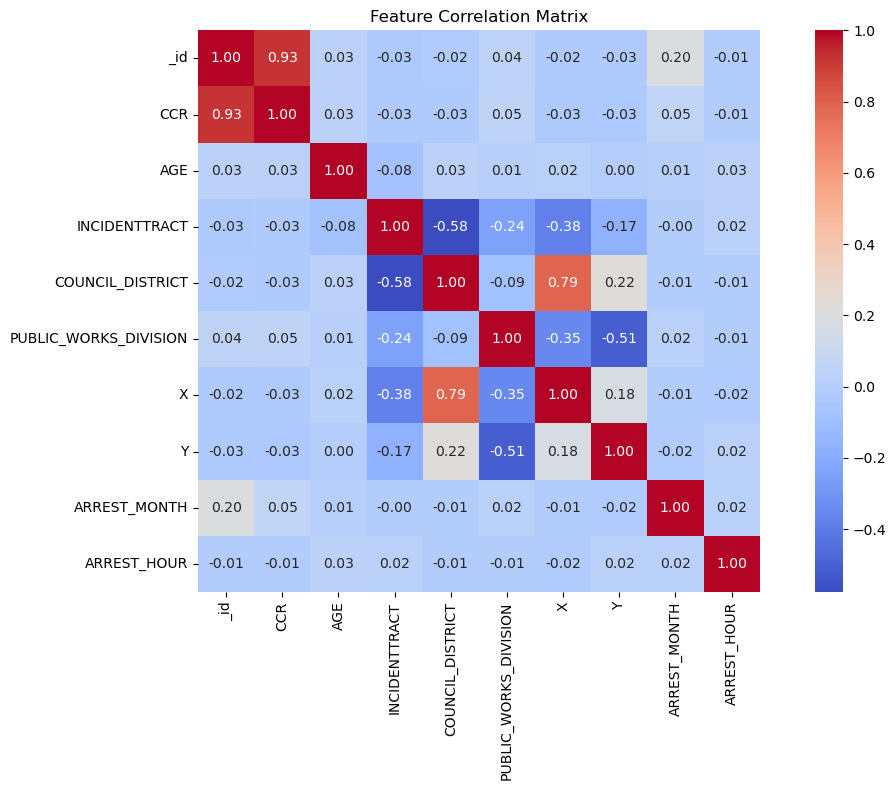

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter only numerical features
numeric_df = df.select_dtypes(include=["float64", "int64"])

# 2. Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# 3. Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


In [3]:
# --------------------------------------------
# STEP 1: Import Libraries
# --------------------------------------------
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler

# --------------------------------------------
# STEP 2: Load Dataset
# --------------------------------------------
df = pd.read_csv("arrest_data_2020_2023_1.csv")
print("Initial shape:", df.shape)

# --------------------------------------------
# STEP 3: Drop Unneeded Columns
# --------------------------------------------
df.columns = df.columns.str.strip()
df = df.drop(columns=["PK", "ORIGINAL_ROW"], errors='ignore')

# --------------------------------------------
# STEP 4: Drop or Fix Missing / Invalid Data
# --------------------------------------------
# Drop rows with missing critical info
df = df.dropna(subset=["OFFENSES", "ARRESTTIME", "RACE", "GENDER", "ARRESTLOCATION", "X", "Y", "INCIDENTTRACT", "PUBLIC_WORKS_DIVISION"])
# Drop age = 0 and fill categorical nulls
df = df[df["AGE"].notnull() & (df["AGE"] > 0)]
df["INCIDENTZONE"] = df["INCIDENTZONE"].fillna("Unknown")
df["COUNCIL_DISTRICT"] = df["COUNCIL_DISTRICT"].fillna("Unknown")
df["INCIDENTNEIGHBORHOOD"] = df["INCIDENTNEIGHBORHOOD"].fillna("Unknown")

# --------------------------------------------
# STEP 5: Time Feature Extraction
# --------------------------------------------
df["ARRESTTIME"] = pd.to_datetime(df["ARRESTTIME"], errors='coerce')
df["ARREST_YEAR"] = df["ARRESTTIME"].dt.year
df["ARREST_MONTH"] = df["ARRESTTIME"].dt.month
df["ARREST_HOUR"] = df["ARRESTTIME"].dt.hour
df["ARREST_DAY"] = df["ARRESTTIME"].dt.day_name()

# --------------------------------------------
# STEP 6: Extract ZIP Code from Address
# --------------------------------------------
df["ARREST_ZIPCODE"] = df["ARRESTLOCATION"].astype(str).str.extract(r'(\d{5})')
df = df.dropna(subset=["ARREST_ZIPCODE"])
df["ARREST_ZIPCODE"] = df["ARREST_ZIPCODE"].astype(str)

# --------------------------------------------
# STEP 7: Extract and Categorize Offense
# --------------------------------------------
df_split = df["OFFENSES"].astype(str).str.split("/", expand=True)
df["OFFENSE_PRIMARY"] = df_split[0].str.strip()

def map_offense_type(offense):
    offense = str(offense).lower()
    if "assault" in offense or "robbery" in offense or "homicide" in offense:
        return "Violent"
    elif "theft" in offense or "burglary" in offense or "mischief" in offense:
        return "Property"
    elif "drug" in offense or "controlled substance" in offense or "possession" in offense:
        return "Drug-Related"
    elif "disorderly" in offense or "drunkenness" in offense or "obstructing" in offense:
        return "Public Order"
    else:
        return "Other"

df["OFFENSE_TYPE"] = df["OFFENSE_PRIMARY"].apply(map_offense_type)

# --------------------------------------------
# STEP 8: Drop Redundant Raw Text Fields
# --------------------------------------------
df = df.drop(columns=["OFFENSES", "OFFENSE_PRIMARY", "ARRESTTIME", "ARRESTLOCATION", "INCIDENTZONE", "INCIDENTLOCATION", "_id", "CCR"], errors='ignore')

# --------------------------------------------
# STEP 9: Encode Categorical Variables
# --------------------------------------------
categorical_cols = ["RACE", "GENDER", "INCIDENTNEIGHBORHOOD", "ARREST_DAY"]
df[categorical_cols] = df[categorical_cols].astype(str)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# --------------------------------------------
# STEP 10: Scale Numerical Features
# --------------------------------------------
scaler = StandardScaler()
numeric_cols = ["AGE", "X", "Y", "ARREST_HOUR", "ARREST_MONTH"]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# --------------------------------------------
# STEP 11: Final Inspection
# --------------------------------------------
print("Final cleaned shape:", df.shape)
print("Columns preview:", df.columns[:10].tolist())
print("Missing values:\n", df.isnull().sum())


Initial shape: (28469, 19)
Final cleaned shape: (22986, 119)
Columns preview: ['AGE', 'INCIDENTTRACT', 'COUNCIL_DISTRICT', 'PUBLIC_WORKS_DIVISION', 'X', 'Y', 'ARREST_YEAR', 'ARREST_MONTH', 'ARREST_HOUR', 'ARREST_ZIPCODE']
Missing values:
 AGE                      0
INCIDENTTRACT            0
COUNCIL_DISTRICT         0
PUBLIC_WORKS_DIVISION    0
X                        0
                        ..
ARREST_DAY_Saturday      0
ARREST_DAY_Sunday        0
ARREST_DAY_Thursday      0
ARREST_DAY_Tuesday       0
ARREST_DAY_Wednesday     0
Length: 119, dtype: int64


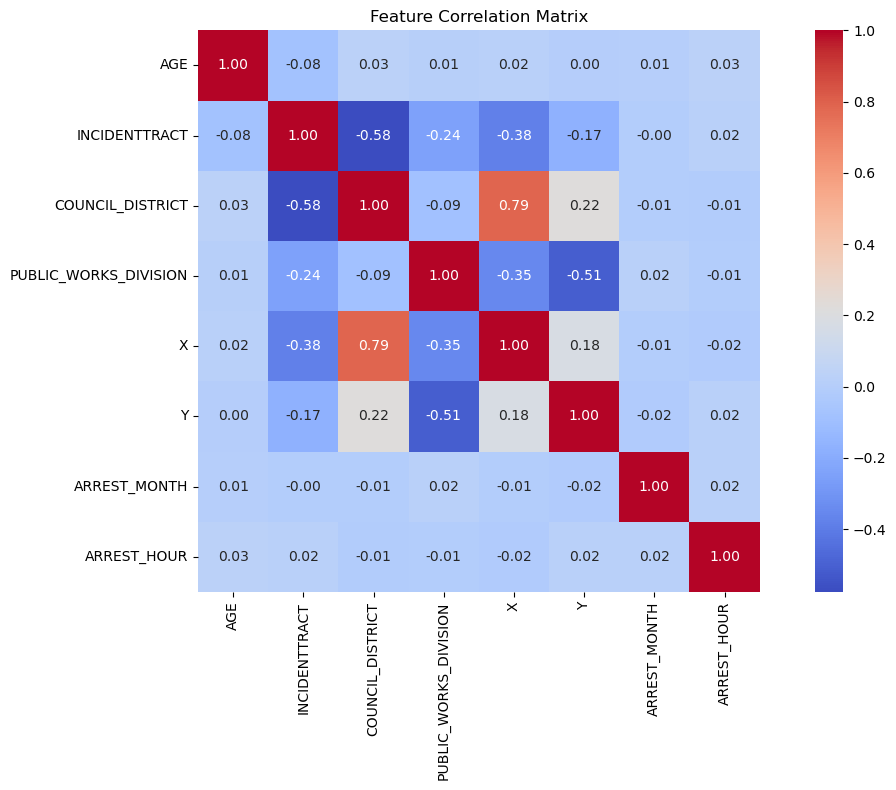

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter only numerical features
numeric_df = df.select_dtypes(include=["float64", "int64"])

# 2. Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# 3. Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


# Modeling

In [6]:
# Define target and features
y = df["OFFENSE_TYPE"]  # your reduced offense labels
X = df.drop(columns=["OFFENSE_TYPE"], errors="ignore") 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Accuracy: 0.5774249673771205
              precision    recall  f1-score   support

Drug-Related       0.56      0.22      0.32       421
       Other       0.58      0.91      0.71      2520
    Property       0.57      0.17      0.26       412
Public Order       0.68      0.10      0.18       143
     Violent       0.50      0.17      0.26      1102

    accuracy                           0.58      4598
   macro avg       0.58      0.32      0.35      4598
weighted avg       0.56      0.58      0.51      4598



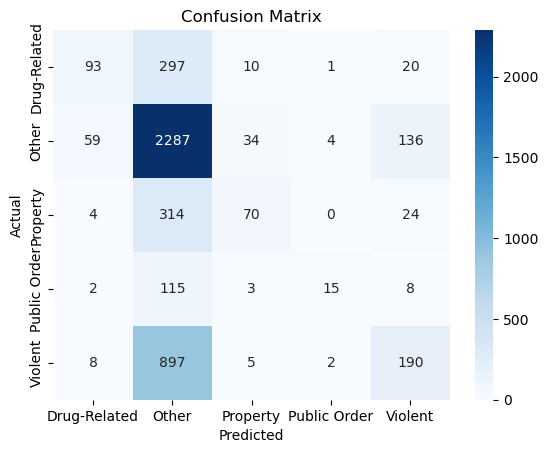

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = rf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
